## Patient care classification 

This project focuses on classifying patients into two categories: "In Care" and "Out Care." The classification is based on various health indicators provided in the dataset. The machine learning models used for classification include Xgboost, Support vector , Random Forest, and Logistic Regression.

The **dataset**, named "PatientCare.csv," contains information about patients, including their gender, age, and various health parameters such as HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE, LEUCOCYTE, THROMBOCYTE, MCH, MCHC, and MCV.



#### Importing neccesary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('E:/ML projects/20.patient care classification system/dataset/PatientCare.csv')

In [14]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


> #### 1 - in care patient , 0- out care patient 

In [15]:
df.tail()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0
3308,32.4,10.7,3.66,9.4,214,29.2,33.0,88.5,72,F,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [17]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


In [18]:
df.shape

(3309, 11)

#### Converting the sex feature male to 1 , female to 0

In [19]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [20]:
gender = {"M" : 1, "F" : 0}
df["SEX"] =df["SEX"].map(gender)

In [22]:
df['SEX'].unique()

array([0, 1])

In [21]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


In [23]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.526745,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.499360,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,1.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000,1.000000


#### Checking for null values

In [24]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

#### Checking for duplicate values

In [26]:
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

In [27]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


([<matplotlib.axis.XTick at 0x2025084b110>,
 [Text(0, 0, 'Out care'), Text(1, 0, 'In care')])

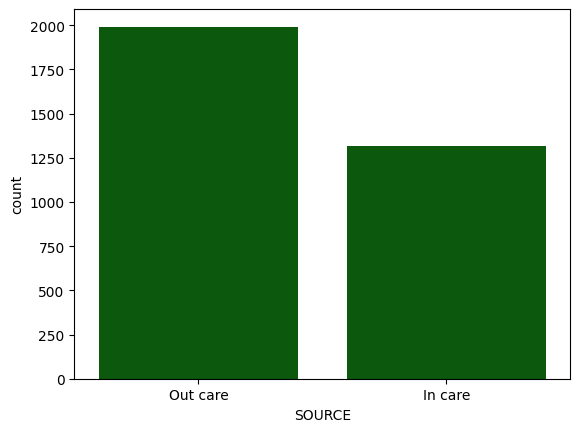

In [32]:
sns.countplot(x='SOURCE',data=df,color='darkgreen')
plt.xticks([0,1],['Out care','In care'])

<Axes: xlabel='AGE', ylabel='Count'>

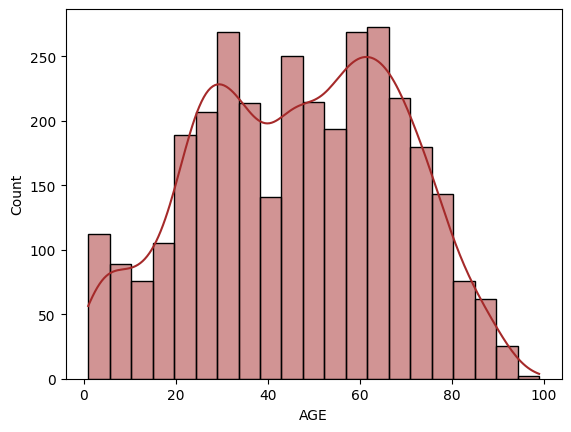

In [38]:
sns.histplot(x='AGE',data=df,color='brown',kde=True)

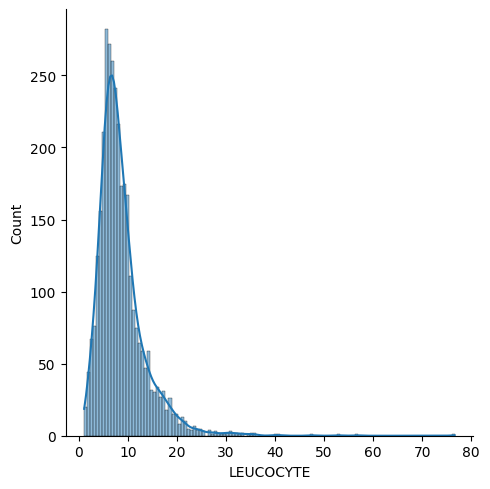

In [40]:
sns.displot(df['LEUCOCYTE'],kde=True)

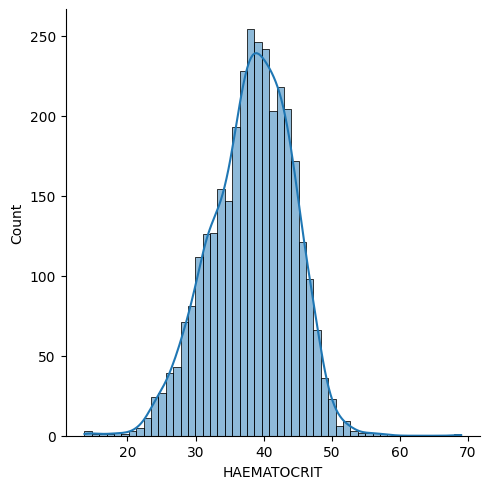

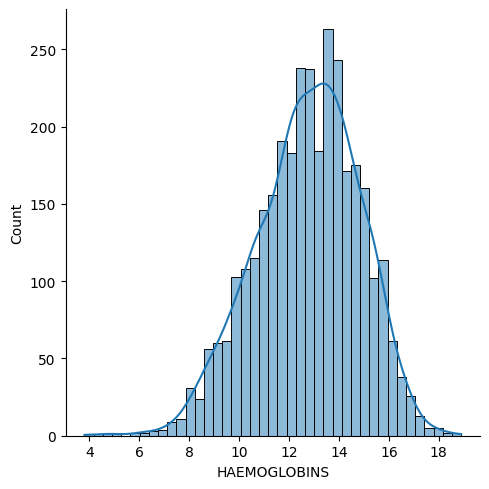

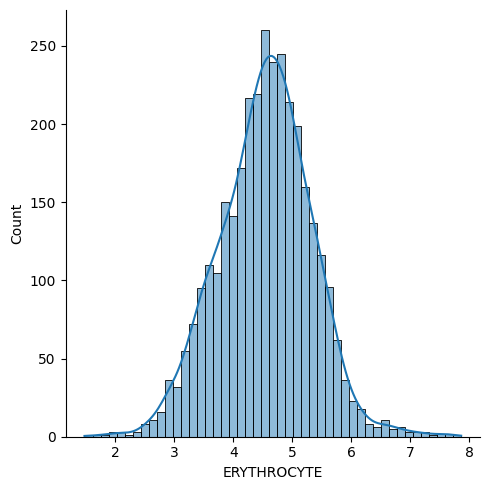

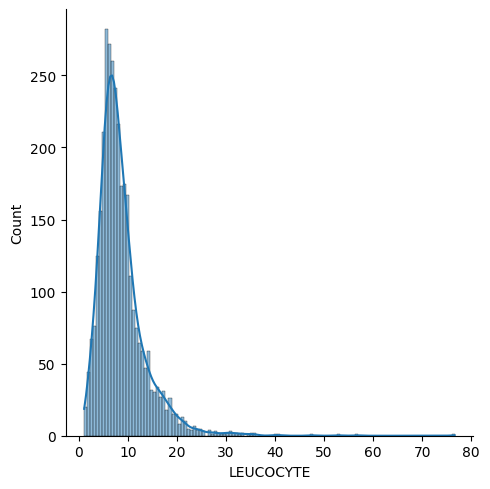

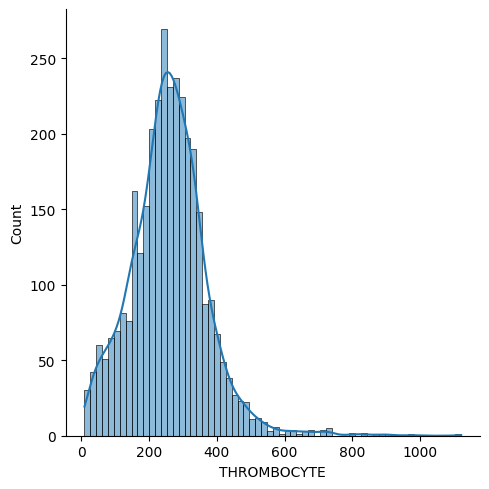

In [42]:
t=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE']
for i in t:
    sns.displot(df[i],kde=True)

<Axes: xlabel='AGE', ylabel='MCH'>

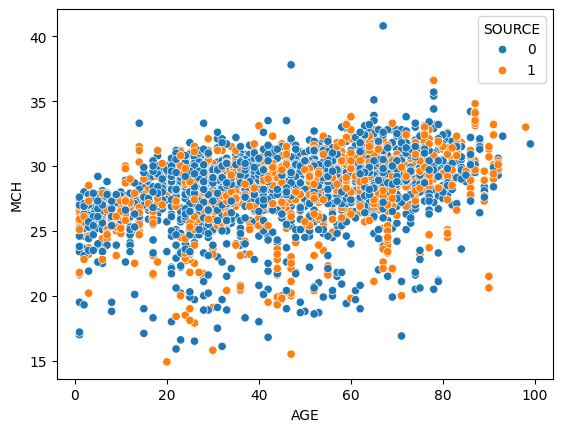

In [46]:
sns.scatterplot(x='AGE',y='MCH',hue='SOURCE',data=df)

#### Selecting independent and dependent features

In [47]:
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [48]:
x

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1
...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1


In [49]:
y

0       1
1       0
2       0
3       0
4       0
       ..
3304    1
3305    1
3306    0
3307    0
3308    1
Name: SOURCE, Length: 3309, dtype: int64

#### Splitting the data for training and testing

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=31)

In [51]:
x_train.shape,x_test.shape

((2481, 10), (828, 10))

#### Standardization

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
scaler

StandardScaler()

In [54]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [55]:
x_train

array([[-9.45572175e-01, -1.17243340e+00, -9.37134089e-01, ...,
         1.01435475e-01,  1.25736141e+00,  9.61638116e-01],
       [-1.04657742e+00, -1.17243340e+00, -9.24191083e-01, ...,
        -1.40423535e-01,  1.16611688e+00, -1.03989222e+00],
       [ 2.05091665e+00,  2.10146126e+00,  1.83266901e+00, ...,
         1.84647085e-03, -6.58773749e-01,  9.61638116e-01],
       ...,
       [ 6.44802369e-02,  3.12043448e-02, -4.19413882e-01, ...,
         9.83509510e-01,  1.07487235e+00, -1.03989222e+00],
       [ 3.33827547e-01,  4.16368422e-01,  2.53622386e-01, ...,
         3.03004720e-02,  8.92383287e-01,  9.61638116e-01],
       [-6.76224865e-01, -5.94687280e-01, -7.30046006e-01, ...,
         1.86797478e-01, -8.41262812e-01, -1.03989222e+00]])

#### Model training

#### Xgboost

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("accuracy score ",accuracy_score(y_test,y_pred))
print("precision score ",precision_score(y_test,y_pred))

accuracy score  0.7572463768115942
precision score  0.7449664429530202


#### Support Vector

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("accuracy score ",accuracy_score(y_test,y_pred))
print("precision score ",precision_score(y_test,y_pred))

accuracy score  0.7584541062801933
precision score  0.7975708502024291


#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("accuracy score ",accuracy_score(y_test,y_pred))
print("precision score ",precision_score(y_test,y_pred))

accuracy score  0.7717391304347826
precision score  0.7743055555555556


#### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("accuracy score ",accuracy_score(y_test,y_pred))
print("precision score ",precision_score(y_test,y_pred))

accuracy score  0.7330917874396136
precision score  0.7739130434782608


#### Among all Random Forest given the best score